In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df=pd.read_csv("Telco-Customer-Churn.csv")
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [78]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [79]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [81]:
df.drop(['customerID'],axis=1,inplace=True)

In [82]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# List of object-type columns to encode
object_cols = df.select_dtypes(include=['object']).columns

# Encode each object-type column
for col in object_cols:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])

# Drop original categorical columns
df.drop(object_cols, axis=1, inplace=True)

# Display the first few rows of the dataframe
print(df.head())

   SeniorCitizen  tenure  MonthlyCharges  gender_encoded  Partner_encoded  \
0              0       1           29.85               0                1   
1              0      34           56.95               1                0   
2              0       2           53.85               1                0   
3              0      45           42.30               1                0   
4              0       2           70.70               0                0   

   Dependents_encoded  PhoneService_encoded  MultipleLines_encoded  \
0                   0                     0                      1   
1                   0                     1                      0   
2                   0                     1                      0   
3                   0                     0                      1   
4                   0                     1                      0   

   InternetService_encoded  OnlineSecurity_encoded  OnlineBackup_encoded  \
0                        0              

In [83]:
df['Churn_encoded'].value_counts()

Churn_encoded
0    5174
1    1869
Name: count, dtype: int64

<Axes: xlabel='Churn_encoded', ylabel='count'>

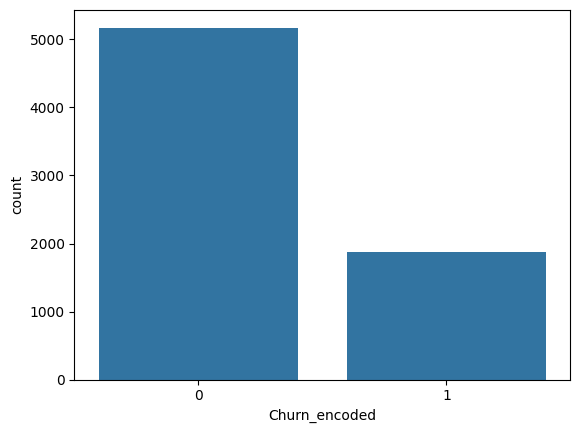

In [84]:
sns.countplot(x='Churn_encoded',data=df)

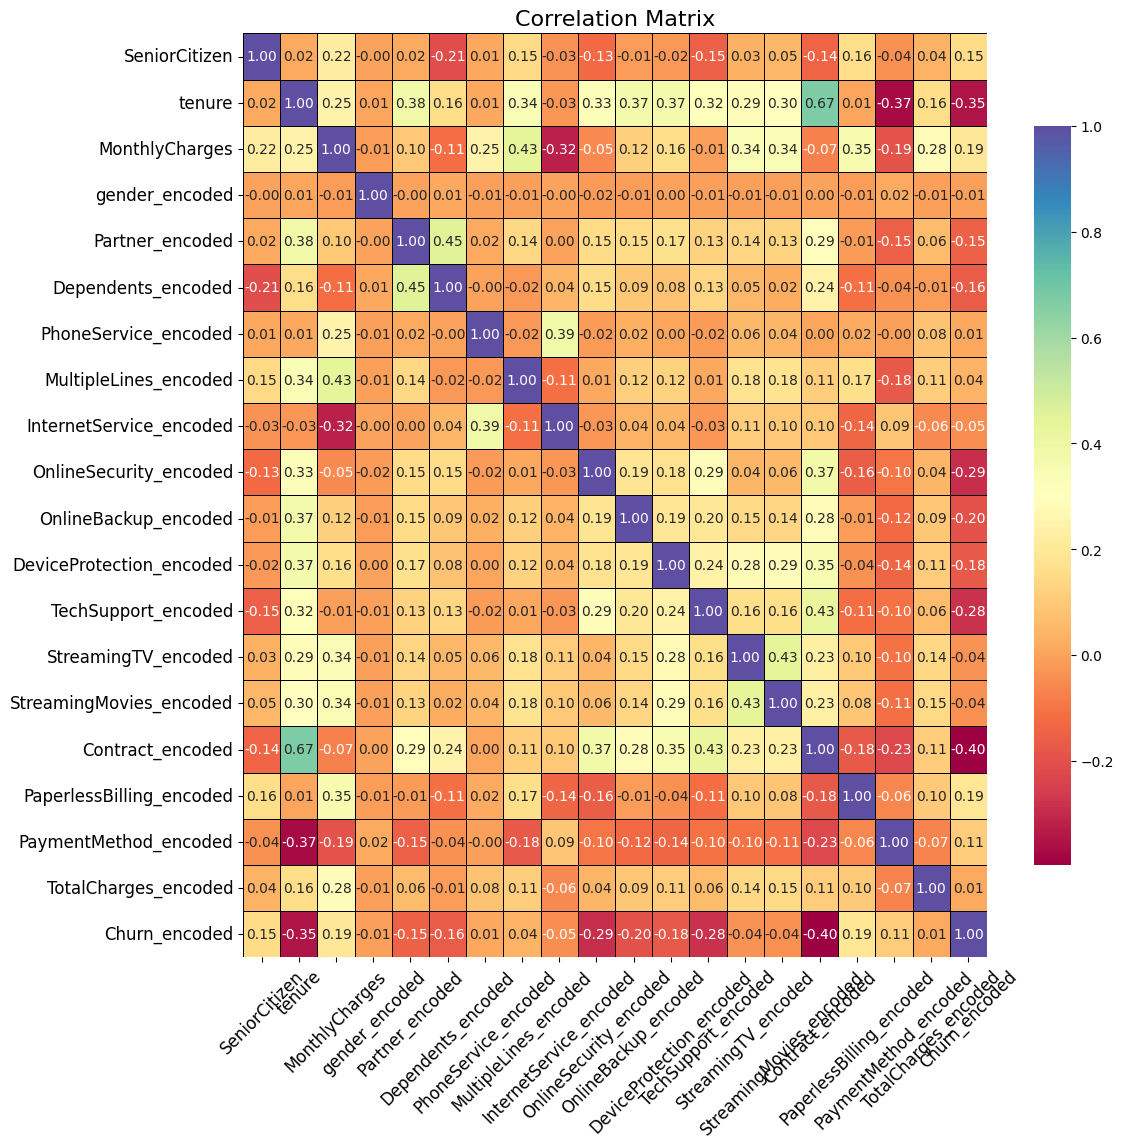

In [85]:
# Calculate the correlation matrix
corr_matrix = df.corr(method="pearson")

# Set up the matplotlib figure
plt.figure(figsize=(12, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Spectral', cbar_kws={'shrink': .8}, 
            linewidths=0.5, linecolor='black', annot_kws={"size": 10})

# Customize the plot
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [86]:
# Calculate Q1, Q3, and IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
df_outliers_removed = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print the number of outliers removed
print(f"Number of outliers removed: {df.shape[0] - df_outliers_removed.shape[0]}")

# Now use df_outliers_removed for model training

Number of outliers removed: 1720


In [87]:
important_features = corr_matrix.index[abs(corr_matrix['Churn_encoded']) >= 0.1].tolist()

# Drop 'Churn_encoded' from the important features list
important_features.remove('Churn_encoded')

# Use df_outliers_removed for further processing
df_outliers_removed = df_outliers_removed[important_features + ['Churn_encoded']]

# Display the first few rows of the filtered dataframe
print(df_outliers_removed.head())

   SeniorCitizen  tenure  MonthlyCharges  Partner_encoded  Dependents_encoded  \
1              0      34           56.95                0                   0   
2              0       2           53.85                0                   0   
4              0       2           70.70                0                   0   
5              0       8           99.65                0                   0   
6              0      22           89.10                0                   1   

   OnlineSecurity_encoded  OnlineBackup_encoded  DeviceProtection_encoded  \
1                       2                     0                         2   
2                       2                     2                         0   
4                       0                     0                         0   
5                       0                     0                         2   
6                       0                     2                         0   

   TechSupport_encoded  Contract_encoded  Paperles

In [88]:
X = df_outliers_removed.drop(['Churn_encoded'], axis=1)
y = df_outliers_removed['Churn_encoded']

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=41)

scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_model=LogisticRegression(max_iter=5000)

In [91]:
penalty=['l1','l2','elasticnet']
l1_ratio=np.linspace(0,1,20)
C=np.logspace(0,10,20)
solver=['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

param_grid={
    'penalty':penalty,
    'l1_ratio':l1_ratio,
    'C':C,
    'solver':solver}

grid_model=GridSearchCV(log_model,param_grid=param_grid)

In [92]:
grid_model.fit(scaled_X_train,y_train);

e:\ML Projetcs\Customer Churn Prediction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
e:\ML Projetcs\Customer Churn Prediction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
e:\ML Projetcs\Customer Churn Prediction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
e:\ML Projetcs\Customer Churn Prediction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
e:\ML Projetcs\Customer Churn Prediction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only

In [93]:
grid_model.best_params_

{'C': np.float64(1.0),
 'l1_ratio': np.float64(0.42105263157894735),
 'penalty': 'elasticnet',
 'solver': 'saga'}

In [94]:
y_pred=grid_model.predict(scaled_X_test)

In [95]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [96]:
accuracy_score(y_test,y_pred)

0.8086303939962477

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       395
           1       0.66      0.54      0.59       138

    accuracy                           0.81       533
   macro avg       0.75      0.72      0.73       533
weighted avg       0.80      0.81      0.80       533



In [98]:
confusion_matrix(y_test,y_pred)

array([[357,  38],
       [ 64,  74]])

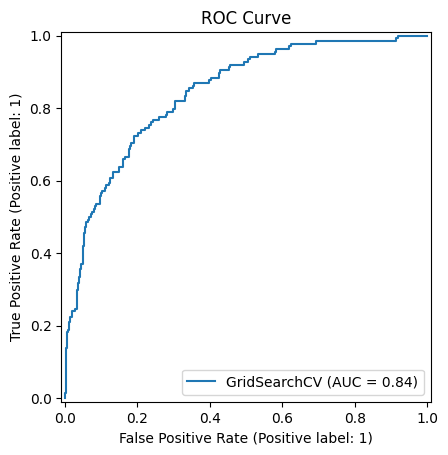

In [99]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score
RocCurveDisplay.from_estimator(grid_model,scaled_X_test,y_test)
plt.title('ROC Curve')
plt.show()

In [107]:
import joblib
import os

os.makedirs('model', exist_ok=True)

joblib.dump(grid_model, 'model/churn_model.pkl')
joblib.dump(scaler, 'model/scaler.pkl')

['model/scaler.pkl']